몇가지 모델을 만들어보고 비교하여 모델을 선택해봅시다


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import pandas_datareader.data as web

df = web.DataReader('005930', 'naver', start='2010-01-01', end='2020-12-31')

In [3]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,16060,16180,16000,16180,239271
2010-01-05,16520,16580,16300,16440,559219
2010-01-06,16580,16820,16520,16820,459755
2010-01-07,16820,16820,16260,16260,443237
2010-01-08,16400,16420,16120,16420,295798
...,...,...,...,...,...
2020-12-23,72400,74000,72300,73900,19411326
2020-12-24,74100,78800,74000,77800,32502870
2020-12-28,79000,80100,78200,78700,40085044


In [4]:
df.dtypes

Open      object
High      object
Low       object
Close     object
Volume    object
dtype: object

In [5]:
import pandas as pd
df=df.apply(pd.to_numeric)

In [6]:
df.dtypes

Open      int64
High      int64
Low       int64
Close     int64
Volume    int64
dtype: object

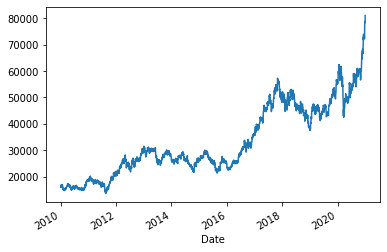

In [7]:
df.Close.plot()

In [8]:
TEST_SIZE = 300

train = df.Close[:-TEST_SIZE]
test = df.Close[-TEST_SIZE:]

In [9]:
import numpy as np
window_size = 20
pred_size = 5

inputs = []
targets = []
for i in range(len(train) - window_size-pred_size):
    inputs.append(np.array(train[i:i+window_size])/train[i])  #시작점의 값으로 나누어 모든 학습데이터가 1에서 시작하도록 변경
    targets.append(np.array(train[i+window_size:i+window_size+pred_size])/train[i+window_size-1]) #시작점의 전값으로 나누어 모든 학습데이터가 1에서 시작하도록 변경


In [10]:
inputs[0]

array([1.        , 1.01606922, 1.03955501, 1.00494438, 1.01483313,
       0.98516687, 1.        , 0.98516687, 1.02224969, 1.0407911 ,
       1.04202719, 1.01730532, 1.03090235, 1.05067985, 1.0197775 ,
       1.0407911 , 1.00741656, 0.98887515, 0.99876391, 0.96909765])

In [11]:
targets[0]

array([0.99107143, 0.98469388, 0.99107143, 0.98979592, 0.95663265])

In [12]:
df.head(30)

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,16060,16180,16000,16180,239271
2010-01-05,16520,16580,16300,16440,559219
2010-01-06,16580,16820,16520,16820,459755
2010-01-07,16820,16820,16260,16260,443237
2010-01-08,16400,16420,16120,16420,295798
2010-01-11,16420,16460,15940,15940,398901
2010-01-12,15940,16180,15900,16180,384460
2010-01-13,16100,16119,15940,15940,267619
2010-01-14,16120,16620,16000,16540,532705


In [13]:
inputs = np.array(inputs)
targets = np.array(targets)

In [14]:
print(inputs.shape)
print(targets.shape)

(2389, 20)
(2389, 5)


In [15]:
window_size = 20
pred_size = 5

test_inputs = []
test_targets = []
for i in range(len(test) - window_size - pred_size):
    test_inputs.append(np.array(test[i:i+window_size])/test[i])
    test_targets.append(np.array(test[i+window_size:i+window_size+pred_size])/test[i+window_size-1])
test_inputs=np.array(test_inputs)
test_targets = np.array(test_targets)

In [16]:
test_inputs = np.expand_dims(test_inputs,2)

In [17]:
test_inputs.shape

(275, 20, 1)

In [18]:

test_targets.shape

(275, 5)

In [19]:
inputs = np.expand_dims(inputs,2)
targets = np.expand_dims(targets,2)
test_targets = np.expand_dims(test_targets,2)

In [20]:
test_targets.shape

(275, 5, 1)

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model1 = tf.keras.Sequential()
model1.add(layers.SimpleRNN(20, 
                           input_shape=(20,1),
                           activation='relu', 
                           return_sequences=False)
          )

model1.add(layers.Dense(5))
model1.add(layers.Reshape([5,1]))


In [22]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 20)                440       
_________________________________________________________________
dense (Dense)                (None, 5)                 105       
_________________________________________________________________
reshape (Reshape)            (None, 5, 1)              0         
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [23]:

model1.compile(loss='mean_squared_error', optimizer='adam')

history = model1.fit(inputs, targets, 
                                    epochs=30, 
                                    batch_size=32,
                                    validation_data=(test_inputs, test_targets))

Epoch 1/30
75/75 [==============================] - 2s 9ms/step - loss: 0.9957 - val_loss: 0.6352
Epoch 2/30
75/75 [==============================] - 0s 5ms/step - loss: 0.2909 - val_loss: 0.0249
Epoch 3/30
75/75 [==============================] - 0s 5ms/step - loss: 0.0047 - val_loss: 0.0054
Epoch 4/30
75/75 [==============================] - 0s 5ms/step - loss: 0.0028 - val_loss: 0.0041
Epoch 5/30
75/75 [==============================] - 0s 5ms/step - loss: 0.0026 - val_loss: 0.0042
Epoch 6/30
75/75 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.0039
Epoch 7/30
75/75 [==============================] - 0s 5ms/step - loss: 0.0024 - val_loss: 0.0036
Epoch 8/30
75/75 [==============================] - 0s 5ms/step - loss: 0.0023 - val_loss: 0.0034
Epoch 9/30
75/75 [==============================] - 0s 5ms/step - loss: 0.0022 - val_loss: 0.0032
Epoch 10/30
75/75 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0030
Epoch 11/30
75/75 [

In [24]:
pred1 = model1.predict(test_inputs)

In [25]:
pred1.shape

(275, 5, 1)

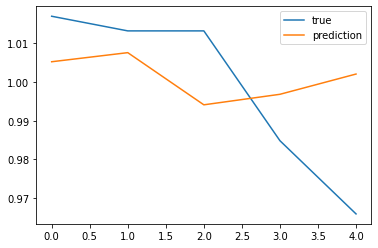

In [26]:
import matplotlib.pyplot as plt

plt.plot(test_targets[1,:,0], label = 'true')
plt.plot(pred1[1,:,0], label = 'prediction')
plt.legend()

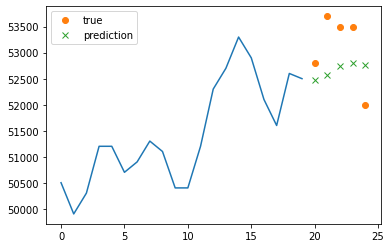

In [27]:
import matplotlib.pyplot as plt
plt.plot(test_inputs[0,:,0]*test[0])
plt.plot(range(20,25),test_targets[0,:,0]*test[19], label = 'true', marker='o',linestyle='None')
plt.plot(range(20,25),pred1[0,:,0]*test[19], label = 'prediction', marker='x',linestyle='None')
plt.legend()

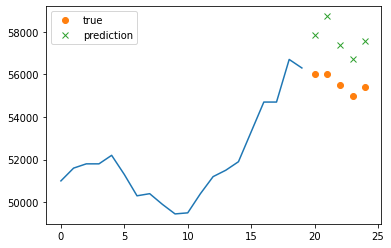

In [28]:
point = 25
import matplotlib.pyplot as plt
plt.plot(test_inputs[point,:,0]*test[point])
plt.plot(range(20,25),test_targets[point,:,0]*test[19+point], label = 'true', marker='o',linestyle='None')
plt.plot(range(20,25),pred1[point,:]*test[19+point], label = 'prediction', marker='x',linestyle='None')
plt.legend()

In [29]:
# 상승/하락을 얼마나 맞추었는지 확인해봅시다

pred1 = np.squeeze(pred1)

In [30]:
pred1.shape

(275, 5)

In [31]:
pred1_df = pd.DataFrame(pred1)

In [32]:
pred1_df

,0,1,2,3,4
0,0.999366,1.001363,1.004769,1.005779,1.004988
1,1.005275,1.007627,0.994132,0.996855,1.002094
2,1.011852,1.017072,0.993109,0.990990,1.002868
3,1.010571,1.017984,1.000156,0.996386,1.003800
4,1.011831,1.016792,1.000712,0.998064,1.006936
...,...,...,...,...,...
270,1.013042,1.021297,1.004702,1.002934,1.014840
271,1.012021,1.020039,1.000414,0.998252,1.012274
272,1.007268,1.016233,1.001111,0.998861,1.009735
273,1.004037,1.008178,1.001195,1.001440,1.007657


In [33]:
pred1_df['up'] = pred1_df[4].apply(lambda x: True if x>1 else False)

In [34]:
pred1_df

,0,1,2,3,4,up
0,0.999366,1.001363,1.004769,1.005779,1.004988,True
1,1.005275,1.007627,0.994132,0.996855,1.002094,True
2,1.011852,1.017072,0.993109,0.990990,1.002868,True
3,1.010571,1.017984,1.000156,0.996386,1.003800,True
4,1.011831,1.016792,1.000712,0.998064,1.006936,True
...,...,...,...,...,...,...
270,1.013042,1.021297,1.004702,1.002934,1.014840,True
271,1.012021,1.020039,1.000414,0.998252,1.012274,True
272,1.007268,1.016233,1.001111,0.998861,1.009735,True
273,1.004037,1.008178,1.001195,1.001440,1.007657,True


In [35]:
pred1_df.up.value_counts()

True     190
False     85
Name: up, dtype: int64

In [36]:
test_targets.shape

(275, 5, 1)

In [37]:
test_targets1 = np.squeeze(test_targets)

In [38]:
test_targets1.shape

(275, 5)

In [39]:
test_targets_df = pd.DataFrame(test_targets1)

In [40]:
test_targets_df

,0,1,2,3,4
0,1.005714,1.022857,1.019048,1.019048,0.990476
1,1.017045,1.013258,1.013258,0.984848,0.965909
2,0.996276,0.996276,0.968343,0.949721,0.960894
3,1.000000,0.971963,0.953271,0.964486,0.968224
4,0.971963,0.953271,0.964486,0.968224,0.968224
...,...,...,...,...,...
270,1.000000,0.993225,0.989160,0.989160,0.979675
271,0.993225,0.989160,0.989160,0.979675,1.001355
272,0.995907,0.995907,0.986357,1.008186,1.061392
273,1.000000,0.990411,1.012329,1.065753,1.078082


In [41]:
pred1_df['true_up'] = test_targets_df[4].apply(lambda x: True if x>1 else False)

In [42]:
pred1_df

,0,1,2,3,4,up,true_up
0,0.999366,1.001363,1.004769,1.005779,1.004988,True,False
1,1.005275,1.007627,0.994132,0.996855,1.002094,True,False
2,1.011852,1.017072,0.993109,0.990990,1.002868,True,False
3,1.010571,1.017984,1.000156,0.996386,1.003800,True,False
4,1.011831,1.016792,1.000712,0.998064,1.006936,True,False
...,...,...,...,...,...,...,...
270,1.013042,1.021297,1.004702,1.002934,1.014840,True,False
271,1.012021,1.020039,1.000414,0.998252,1.012274,True,True
272,1.007268,1.016233,1.001111,0.998861,1.009735,True,True
273,1.004037,1.008178,1.001195,1.001440,1.007657,True,True


In [43]:
pred1_df.true_up.value_counts()

True     162
False    113
Name: true_up, dtype: int64

In [44]:
pred1_df['correct'] = pred1_df.apply(lambda row: True if row['true_up']==row['up'] else False, axis =1)

In [45]:
pred1_df.correct.value_counts()

False    138
True     137
Name: correct, dtype: int64

In [46]:
confusion1_mat = tf.math.confusion_matrix(pred1_df.true_up, pred1_df.up)

In [47]:
confusion1_mat

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 30,  83],
       [ 55, 107]], dtype=int32)>

Text(33.0, 0.5, 'Label')

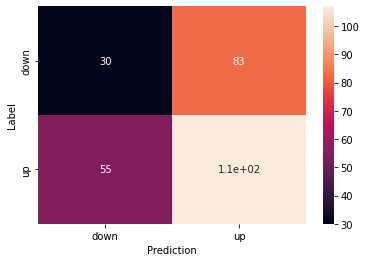

In [48]:
import seaborn as sns
sns.heatmap(confusion1_mat,annot=True,
            xticklabels=['down', 'up'], yticklabels=['down','up'])
plt.xlabel('Prediction')
plt.ylabel('Label')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20)                1760      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 105       
_________________________________________________________________
reshape_1 (Reshape)          (None, 5, 1)              0         
Total params: 1,865
Trainable params: 1,865
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
75/75 [==============================] - 2s 12ms/step - loss: 0.5495 - val_loss: 0.0187
Epoch 2/30
75/75 [==============================] - 1s 10ms/step - loss: 0.0106 - val_loss: 0.0132
Epoch 3/30
75/75 [==============================] - 1s 10ms/step - loss: 0.0078 - val_loss: 0.0102
Epoch 4/30
75/75 [==============================] - 1s 10ms/step - loss: 0.0064 - val

Text(33.0, 0.5, 'Label')

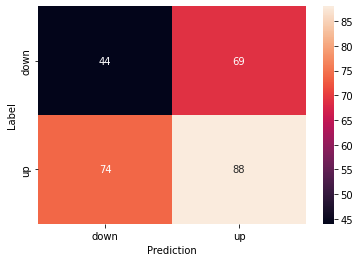

In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model2 = tf.keras.Sequential()
model2.add(layers.LSTM(20, 
                           input_shape=(20,1),
                           activation='relu', 
                           return_sequences=False)
          )

model2.add(layers.Dense(5))
model2.add(layers.Reshape([5,1]))
model2.summary()


model2.compile(loss='mean_squared_error', optimizer='adam')

history = model2.fit(inputs, targets, 
                                    epochs=30, 
                                    batch_size=32,
                                    validation_data=(test_inputs, test_targets))
pred2 = model2.predict(test_inputs)
pred2 = np.squeeze(pred2)
pred2_df = pd.DataFrame(pred2)
pred2_df['up'] = pred2_df[4].apply(lambda x: True if x>1 else False)
pred2_df['true_up'] = test_targets_df[4].apply(lambda x: True if x>1 else False)
confusion2_mat = tf.math.confusion_matrix(pred2_df.true_up, pred2_df.up)
import seaborn as sns
sns.heatmap(confusion2_mat,annot=True,
            xticklabels=['down', 'up'], yticklabels=['down','up'])
plt.xlabel('Prediction')
plt.ylabel('Label')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20, 20)            1760      
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                1240      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
reshape_2 (Reshape)          (None, 5, 1)              0         
Total params: 3,055
Trainable params: 3,055
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
75/75 [==============================] - 4s 22ms/step - loss: 0.8083 - val_loss: 0.5632
Epoch 2/30
75/75 [==============================] - 1s 17ms/step - loss: 0.3693 - val_loss: 0.2066
Epoch 3/30
75/75 [==============================] - 

Text(33.0, 0.5, 'Label')

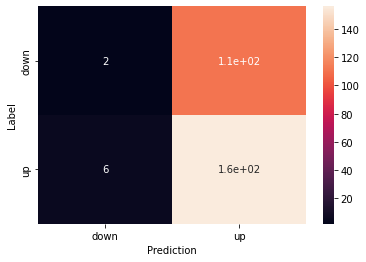

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model2 = tf.keras.Sequential()
model2.add(layers.LSTM(20, 
                           input_shape=(20,1),
                           activation='relu', 
                           return_sequences=True)
          )
model2.add(layers.LSTM(10,                            
                           activation='relu', 
                           return_sequences=False)
          )

model2.add(layers.Dense(5))
model2.add(layers.Reshape([5,1]))
model2.summary()


model2.compile(loss='mean_squared_error', optimizer='adam')

history = model2.fit(inputs, targets, 
                                    epochs=30, 
                                    batch_size=32,
                                    validation_data=(test_inputs, test_targets))
pred2 = model2.predict(test_inputs)
pred2 = np.squeeze(pred2)
pred2_df = pd.DataFrame(pred2)
pred2_df['up'] = pred2_df[4].apply(lambda x: True if x>1 else False)
pred2_df['true_up'] = test_targets_df[4].apply(lambda x: True if x>1 else False)
confusion2_mat = tf.math.confusion_matrix(pred2_df.true_up, pred2_df.up)
import seaborn as sns
sns.heatmap(confusion2_mat,annot=True,
            xticklabels=['down', 'up'], yticklabels=['down','up'])
plt.xlabel('Prediction')
plt.ylabel('Label')

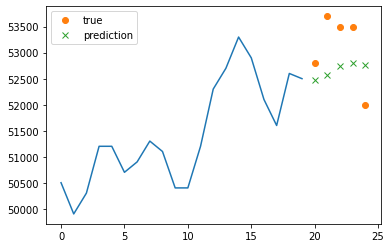

In [51]:
import matplotlib.pyplot as plt
plt.plot(test_inputs[0,:,0]*test[0])
plt.plot(range(20,25),test_targets[0,:,0]*test[19], label = 'true', marker='o',linestyle='None')
plt.plot(range(20,25),pred1[0,:]*test[19], label = 'prediction', marker='x',linestyle='None')
plt.legend()

In [52]:
pred2_df

,0,1,2,3,4,up,true_up
0,1.004237,1.006177,1.004684,1.006916,1.010275,True,False
1,1.004099,1.007518,1.006074,1.007952,1.011000,True,False
2,1.004300,1.007044,1.005614,1.007398,1.010764,True,False
3,1.004055,1.005255,1.003867,1.005927,1.009584,True,False
4,1.003930,1.005302,1.003932,1.005983,1.009560,True,False
...,...,...,...,...,...,...,...
270,0.999935,1.004895,1.004451,1.005091,1.007388,True,False
271,0.998487,1.005479,1.005094,1.006227,1.007257,True,True
272,0.997501,1.006039,1.005632,1.007336,1.007315,True,True
273,1.001492,1.004650,1.003849,1.005088,1.007988,True,True


In [53]:
pred2_df.up.value_counts()

True     267
False      8
Name: up, dtype: int64

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 20, 20)            1380      
_________________________________________________________________
gru_1 (GRU)                  (None, 10)                960       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
reshape_3 (Reshape)          (None, 5, 1)              0         
Total params: 2,395
Trainable params: 2,395
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
75/75 [==============================] - 4s 27ms/step - loss: 0.7613 - val_loss: 0.3359
Epoch 2/30
75/75 [=

Text(33.0, 0.5, 'Label')

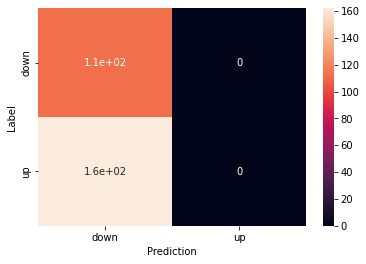

In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model2 = tf.keras.Sequential()
model2.add(layers.GRU(20, 
                           input_shape=(20,1),
                           activation='relu', 
                           return_sequences=True)
          )
model2.add(layers.GRU(10,                            
                           activation='relu', 
                           return_sequences=False)
          )
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(5))
model2.add(layers.Reshape([5,1]))
model2.summary()


model2.compile(loss='mean_squared_error', optimizer='adam')

import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model2.fit(inputs, targets, 
                                    epochs=30, 
                                    batch_size=32,
                                    validation_data=(test_inputs, test_targets),
                                    callbacks = [tensorboard_callback]
                                    )
pred2 = model2.predict(test_inputs)
pred2 = np.squeeze(pred2)
pred2_df = pd.DataFrame(pred2)
pred2_df['up'] = pred2_df[4].apply(lambda x: True if x>1 else False)
pred2_df['true_up'] = test_targets_df[4].apply(lambda x: True if x>1 else False)
confusion2_mat = tf.math.confusion_matrix(pred2_df.true_up, pred2_df.up)
import seaborn as sns
sns.heatmap(confusion2_mat,annot=True,
            xticklabels=['down', 'up'], yticklabels=['down','up'])
plt.xlabel('Prediction')
plt.ylabel('Label')

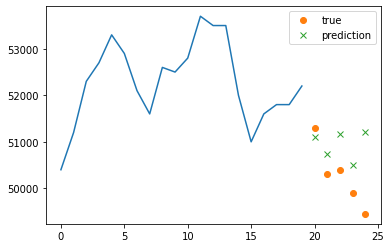

In [55]:
point = 10
import matplotlib.pyplot as plt
plt.plot(test_inputs[point,:,0]*test[point])
plt.plot(range(20,25),test_targets[point,:,0]*test[19+point], label = 'true', marker='o',linestyle='None')
plt.plot(range(20,25),pred2[point,:]*test[19+point], label = 'prediction', marker='x',linestyle='None')
plt.legend()

학습을 위한 코드이고, 실제 활용에 부적합합니다. 